# STOCK PRICE PREDICTION
---



**1). Importing Libraries**



In [ ]:
# In this cell, we'll import all the libraries which are required in our model like-

#1). Pandas (Python software library used for Data Manipulation and Analysis)
import pandas as pd
#2). Numpy (Python library that provides support for large multidimensional arrays and matrices along with a collection of mathematical functions)
import numpy as np
#3). Matplotlib (Python plotting library used for creating static, animated, and interactive visualizations)
import matplotlib.pyplot as plt
#4). Scikit-learn (Machine learning library for Python providing diverse algorithms for classification, regression, clustering, etc.)
#imports from scikit learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, accuracy_score, mean_squared_error, r2_score

**2). Loading And Inspecting Data**

In [ ]:
# In this cell, we'll read the file (MSFT.csv) with .pd function
df = pd.read_csv('MSFT.csv')
# In this '.info()' function is used to print the structure of MSFT data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [ ]:
# Checking null values by '.isnull().sum' function
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [ ]:
# In this cell using the '.shape' function we can show the shape of the data showing rows and columns.
df.shape

(252, 7)

In [ ]:
# Here, the '.describe()' function is used to describe the data briefly.
df.describe()


,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,295.402540,298.631270,291.743968,295.345873,294.330894,3.003821e+07
std,25.348853,24.949359,25.514830,25.257764,24.714573,1.094825e+07
min,243.860001,245.740005,241.509995,242.259995,242.259995,1.474790e+07
25%,277.707496,282.924988,274.099998,277.477493,276.832725,2.249658e+07
50%,296.274994,298.930008,293.584992,296.169999,294.831284,2.833885e+07
75%,309.690002,312.385002,306.649993,310.325012,308.835022,3.480578e+07
max,344.619995,349.670013,342.200012,343.109985,341.606384,9.042890e+07


**3). Data Preprocessing (Feature separating and selecting target variable)**


In [ ]:
# Declaring input (features) by using '.drop' function.
X = df.drop(["Close","Date","Adj Close"], axis = 1)
# 'axis = 1' means targeting columns, and 'Adj Close' defines the closing price adjusted to reflect the value after accounting for any corporate actions.

Y = df["Close"]
# Declaring output (target). Also, here 'Close' defines the price from the last transaction of a trading day.




**4). Data Splitting**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# In this process we're dividing a dataset into training and testing sets for the training and testing of a machine learning model by train_test_split.
# The test_size is a parameter that determines the proportion of the original dataset to include in the test split.
# We've set it to 0.2 which means 20% of the data will be used for the testing set, and the remaining 80% for the training set.
# random_state is a parameter that controls the random number generator used to shuffle the data before splitting it.

**5). Training the Model**

In [ ]:
# Create a Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, Y_train)

LinearRegression()

**6). Prediction of Model**



In [ ]:
# Using '.predict()' function to test the model
Y_pred = model.predict(X_test)
print("prediction is:", Y_pred)

prediction is: [309.94397045 342.20453986 284.89505045 312.85127327 296.73611569
 271.42958035 313.88590025 254.23363744 336.95535095 297.53621705
 298.04145513 256.3739584  304.67780401 260.77384513 303.17208858
 338.53575593 271.38611577 286.45338506 313.98060496 333.12170929
 252.88198003 308.52361673 275.47335902 295.76272315 297.54767441
 293.38958684 300.84348748 332.99175426 263.19224554 295.6572943
 282.01373255 294.36517735 282.08453726 276.65410848 280.98860697
 281.15036174 265.15350578 304.18933294 302.87107294 265.11545885
 296.51435545 304.05075718 272.10156174 279.48886297 331.09417735
 291.40503505 267.01712615 307.20301404 335.17451798 285.14440557
 336.17687482]


**7). Evaluation of Model**

In [ ]:
# Here, 'model.score' tells the accuracy of training data of X and Y
accuracy = model.score(X_train, Y_train)
print("accuracy is:", model.score(X_train, Y_train))

mape = mean_absolute_percentage_error(Y_pred, Y_test)
print("mape is:", mean_absolute_percentage_error(Y_pred, Y_test))
# mape gives a percentage that represents how far off predictions are from the actual values, on average.

mse = mean_squared_error(Y_pred, Y_test)
print("mse is:", mean_squared_error(Y_pred, Y_test))
# mse measures model accuracy by averaging squared prediction errors.

r2 = r2_score(Y_pred, Y_test)
print("r2 is:", r2_score(Y_pred, Y_test))
# r2 shows how well a model explains the variance in the target.

# Lower mape value indicates a more accurate model.
# Lower the value of mse, better  will be the model.
# Higher the value of r2,  better will be the model.

# Here, accuracy tells that the model is 99% accurate.

accuracy is: 0.9942737324278513
mape is: 0.005772395222903426
mse is: 7.346208593916275
r2 is: 0.98695511705664


**8). Visualization And Interpretation**

In [ ]:
# So, before doing visualization we're making 'viz' dataframe for better visualization of the model.
# 'viz' dataframe is a dataframe which contains all the features of the dataset and the target variable.

viz = df.copy()

# The 'viz = df.copy()' statement creates a new DataFrame called viz by making a shallow copy of the original DataFrame df.

In [ ]:
viz["Date"] = pd.to_datetime(viz["Date"])

# This part of the code converts the values in the 'Date' column of the DataFrame viz to datetime format.
# It ensures that the data in the 'Date' column is treated as dates rather than plain text.
# This means that the original 'Date' column is replaced with the datetime values.

In [ ]:
# In this cell '.dtypes' returns a series with the data type of each column.
viz.dtypes

,0
Date,datetime64[ns]
Open,float64
High,float64
Low,float64
Close,float64
Adj Close,float64
Volume,int64


In [ ]:
df2 = pd.DataFrame({"date":viz["Date"], "close":viz["Close"]})
df2.set_index("date", inplace = True)

# In the 1st line of this code, a new DataFrame called 'df2' is created.
# It contains two columns: 'date' and 'close' we want to create a graph between Date and Close.
# The data for the 'date' column comes from the 'Date' column of the viz DataFrame,
# and the data for the close column comes from the 'Close' column of the same DataFrame.

# In the 2nd line of the code, it sets the 'date' column as the index of the df2 DataFrame.
# By doing this, we can effectively perform time-based operations and queries on the data using the date index.

**9). Main Visualization of the Model for STOCK PRICE PREDICTION from 1988-2024 based on historical data**

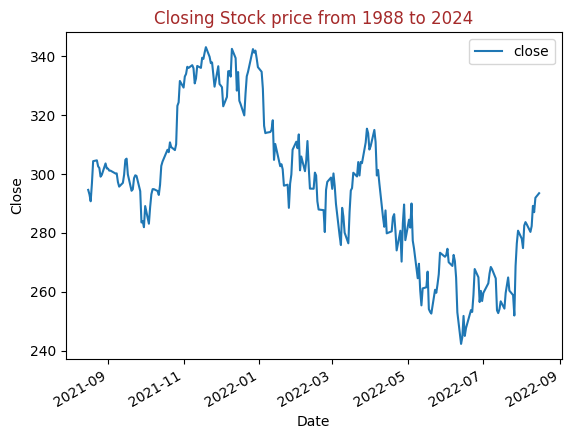

In [ ]:
df2.plot()
plt.xlabel("Date", color = "black")
plt.ylabel("Close", color = "black")
plt.title("Closing Stock price from 1988 to 2024", color = "brown")
plt.show()

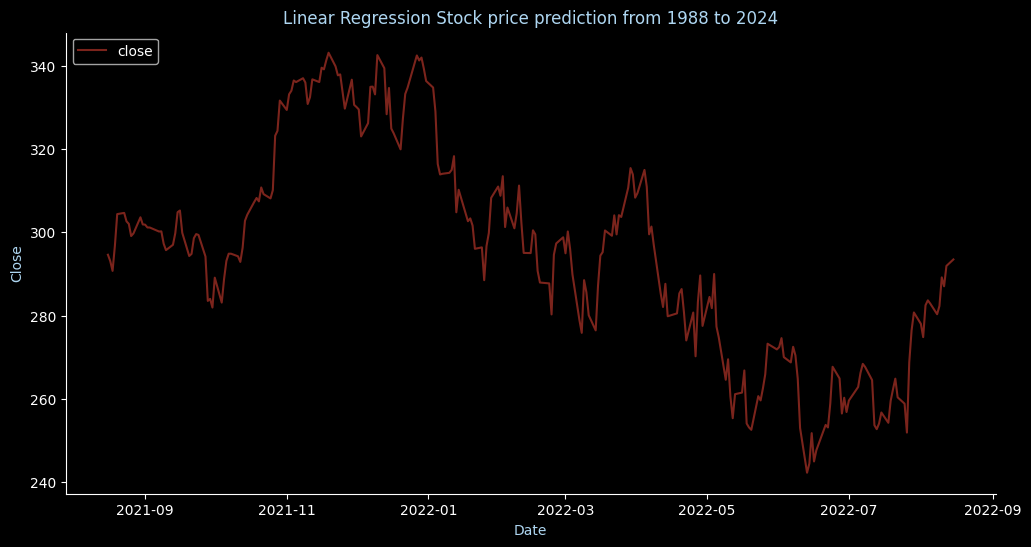

In [ ]:
# Now we're showing the same graph with different methods so that it looks more attractive

def style():
    plt.figure(facecolor = 'black', figsize = (12,6))
    ax = plt.axes()

    ax.tick_params(axis = 'x', colors = 'white')
    # Setting up X-axis tick color to white, "where tick_params change the appearance of ticks,ticklabels,and gridlines".

    ax.tick_params(axis = 'y', colors = 'white')
    # Setting up Y-axis tick color to white.

    ax.spines['left'].set_color('white')
    # Setting up Y-axis spine color to white.

    ax.spines['bottom'].set_color('white')
    # Setting up X-axis spine color to white.

    ax.set_facecolor("black")
     # Setting the background color of the plot using set_facecolor() method.

style()

plt.title("Linear Regression Stock price prediction from 1988 to 2024", color = "#aed6f1")
plt.plot(viz["Date"], viz["Close"], color = "#7b241c")
plt.legend(["close"], loc = "upper left", facecolor = "black", labelcolor = "white")
plt.xlabel("Date", color = "#aed6f1")
plt.ylabel("Close", color = "#aed6f1")
plt.show()

The graph titled "Linear Regression Stock Price Prediction from 1988 to 2024" shows the historical performance of a stock.
The x-axis represents years, ranging from 1988 to 2024, while the y-axis represents closing stock prices (ranging from 0 to 350).
Until around 2016, the stock price remained relatively stable, but it sharply increased, peaking between 2020 and 2024.
   Therefore, In this manner we can predict the STOCKPRICE.

This is the procedure of making an ML model, i.e.-



1. DATA COLLECTION  
2. DATA PREPARATION BY IMPORTING LIBRARIES AND LOADING THE DATA
3. CHOOSING THE MODEL
4. PREPROCESSING OF DATA
5. DATA SPLITTING
6. TRAINING THE MODEL
7. EVALUATING THE MODEL
8. VISUALIZING THE MODEL
9. USING THE MODEL











# **Conclusion**

The "Stock Price Prediction" project showcases the effective use of Python libraries to analyze and forecast Microsoft stock prices. By processing historical data and implementing machine learning models, the project highlights how computational tools can uncover patterns and trends in financial markets.

The results demonstrate that predictive modeling can provide valuable insights into stock price movements, supporting better decision-making for investors and analysts. While the models achieved reasonable accuracy, further integration of advanced techniques, external factors, and real-time data streams could enhance the prediction's reliability and practical relevance. This project sets a foundation for future exploration into dynamic and data-driven financial forecasting.